## Feature Extraction

Feature Engineering is a very key part of Natural Language Processing. as we all know algorithms and machines can’t understand characters or words or sentences hence we need to encode these words into some specific form of numerical in order to interact with algorithms or machines. we can’t feed the text data containing words /sentences/characters to a machine learning model.

There are various ways to perform feature extraction. some popular and mostly used are:-

    Bag of Words model
    TF-IDF

### 1. Bag of Words model

The idea is to take the whole text data and count their frequency of occurrence. and map the words with their frequency. This method doesn’t care about the order of the words, but it does care how many times a word occurs and the default bag of words model treats all words equally.

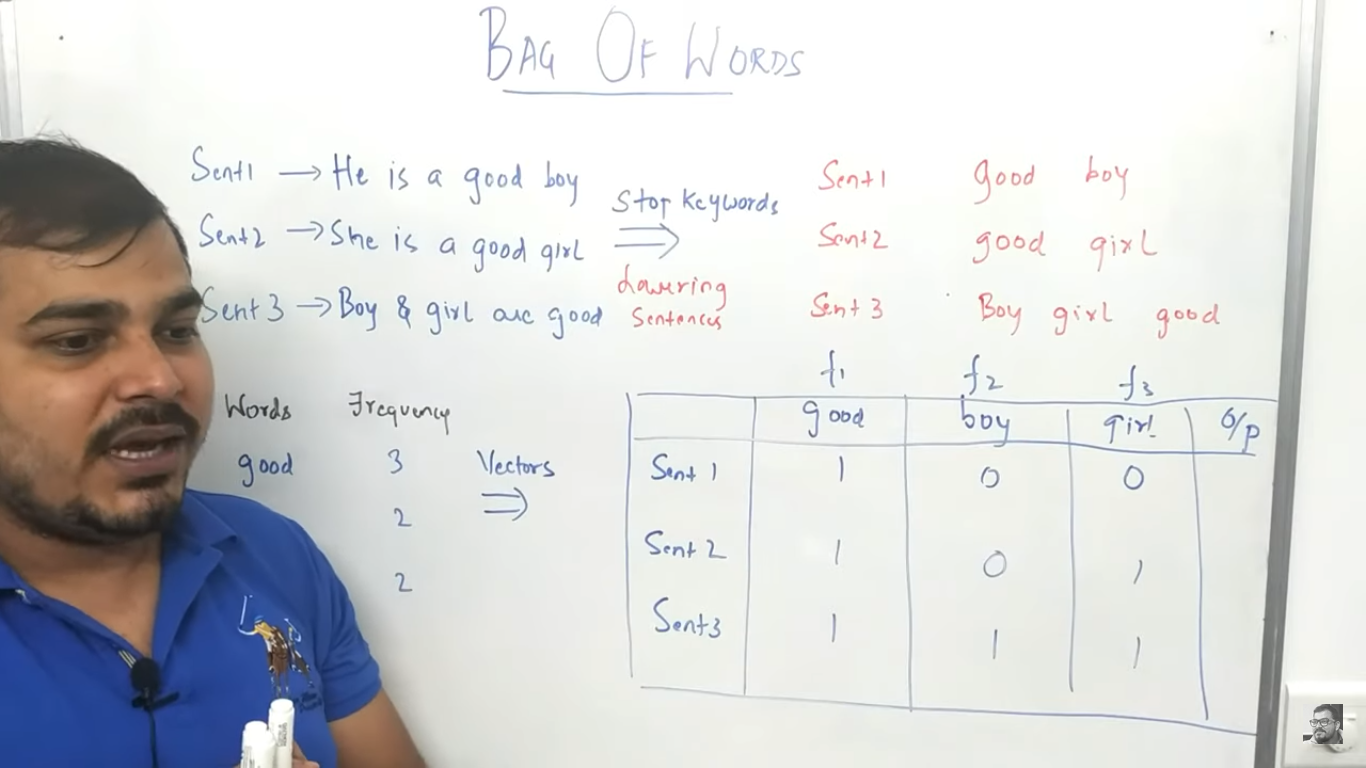

In [6]:
import sklearn
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

text = ["i love NLP",
        "NLP is future",
        "i will learn in 2 months"]

count_matrix = vectorizer.fit_transform(text)
count_array = count_matrix.toarray()
BOW = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names())
BOW

,future,in,is,learn,love,months,nlp,will
0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,1,0
2,0,1,0,1,0,1,0,1


### 2. TF-IDF (Term frequency-inverse Document Frequency)

The BOW model doesn’t give good results since it has a drawback. Assume that there is a particular word that is appearing in all the documents and it comes multiple times, eventually, it will have a higher frequency of occurrence and it will have a greater value that will cause a specific word to have more weightage in a sentence, that’s not good for our analysis.

Term frequency (TF): Number of times a term has appeared in a document. The term frequency is a measure of how frequently or how common a word is for a given sentence.

Inverse Document Frequency (IDF): The inverse document frequency (IDF ) is a measure of how rare a word is in a document. Words like “the”,” a” show up in all the documents but rare words will not occur in all the documents of the corpus.

If a word appears in almost every document means it’s not significant for the classification.

IDF of a word is = log(N/n)

    N: total number of documents.
    n: number of documents containing a term (word)

TF-IDF Evaluates how relevant is a word to its sentence in a collection of sentences or documents.

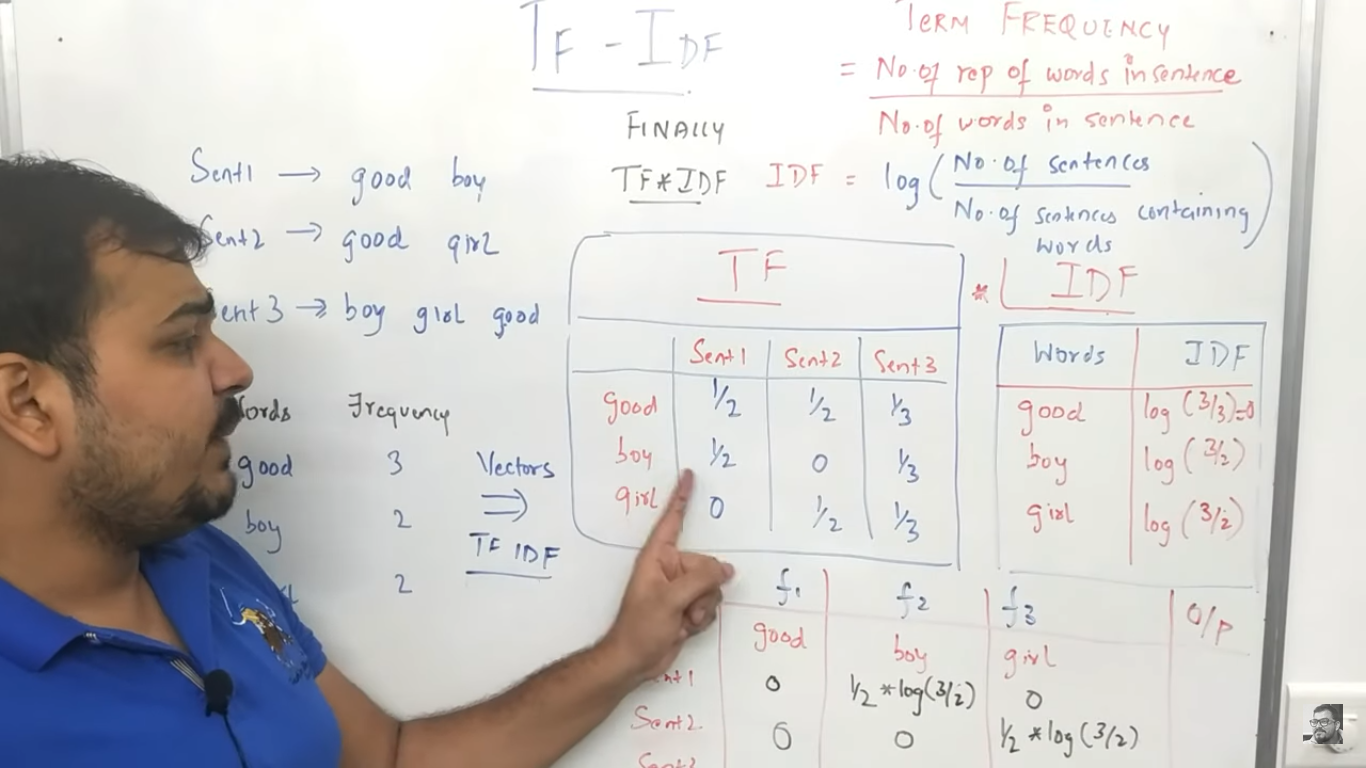

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["i love the NLP",
        "NLP is the future",
        "i will learn the NLP"]

vectorizer = TfidfVectorizer()
matrix = vectorizer.fit_transform(text)
count_array = matrix.toarray()
df = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names())
df

,future,is,learn,love,nlp,the,will
0,0.000000,0.000000,0.000000,0.767495,0.453295,0.453295,0.000000
1,0.608845,0.608845,0.000000,0.000000,0.359594,0.359594,0.000000
2,0.000000,0.000000,0.608845,0.000000,0.359594,0.359594,0.608845


### 3. Word Embedding

Imagine I have 2 words “love” and “like”, these two words have almost similar meanings but according to TF-IDF and BOW model these two will have separate feature values and these 2 words will be treated completely different.

TF-IDF, BOW model completely depends on the frequency of occurrence, it doesn’t take the meaning of words into consideration, hence above-discussed techniques are failed to capture the context and meaning of sentences.

“I like you” and “I love you” will have completely different feature vectors according to TF-IDF and BOW model, but that’s not correct.

<img src="https://cdn-images-1.medium.com/max/1500/1*xD9n3KeWXuenMNL_BpYp6A.png">

### 1. Loading glove word embedding of 100 dimensions into a dictionary:

In [12]:
import numpy as np
glove_vectors = dict()
file = open('glove.6B.50d.txt', encoding = 'utf-8')
for line in file:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:])
    glove_vectors[word] = vectors
file.close()

In [15]:
glove_vectors['house']

array(['0.60137', '0.28521', '-0.032038', '-0.43026', '0.74806',
       '0.26223', '-0.97361', '0.078581', '-0.57588', '-1.188', '-1.8507',
       '-0.24887', '0.055549', '0.0086155', '0.067951', '0.40554',
       '-0.073998', '-0.21318', '0.37167', '-0.71791', '1.2234',
       '0.35546', '-0.41537', '-0.21931', '-0.39661', '-1.7831',
       '-0.41507', '0.29533', '-0.41254', '0.020096', '2.7425', '-0.9926',
       '-0.71033', '-0.46813', '0.28265', '-0.077639', '0.3041',
       '-0.06644', '0.3951', '-0.70747', '-0.38894', '0.23158',
       '-0.49508', '0.14612', '-0.02314', '0.56389', '-0.86188',
       '-1.0278', '0.039922', '0.20018'], dtype='<U9')

### 2. Creating a function that takes every sentence and returns word vectors:

In [16]:
vec_dimension = 100
def get_vec(x):
    arr  = np.zeros(vec_dimension)
    text = str(x).split()
    for t in text:
        try:
            vec = glove_vectors.get(t).astype(float)
            arr = arr + vec
        except:
            pass
    arr = arr.reshape(1,-1)[0]
    return(arr/len(text))

In [17]:
x = ['I love you',
     'I love NLP and i will try to learn',
    'this is word embedding']
features = get_vec(x)
features

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])